# **1- Load Data (Kaggle)**

In [4]:
%%capture
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the API
api = KaggleApi()
api.authenticate()

# Download the dataset
dataset = "abdullah0a/world-happiness-data-2024-explore-life"
api.dataset_download_files(dataset, path="./data", unzip=True)

print("Dataset downloaded and extracted to ./data")

Dataset URL: https://www.kaggle.com/datasets/abdullah0a/world-happiness-data-2024-explore-life
Dataset downloaded and extracted to ./data


In [9]:
!ls ./data

'World Happiness Report 2024.csv'


# **2-Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# **3-Data preparation**

In [11]:
# Load the dataset
df = pd.read_csv("./data/World Happiness Report 2024.csv")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [16]:
df.isnull().sum().sort_values(ascending=True)

,0
Country name,0
year,0
Life Ladder,0
Social support,13
Negative affect,16
Positive affect,24
Log GDP per capita,28
Freedom to make life choices,36
Healthy life expectancy at birth,63
Generosity,81


In [17]:
df = df.fillna(method='pad')

<ipython-input-17-4d7ddb4551e6>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


In [40]:
data = df.drop('Country name', axis=1)

# **4-Standard Scaling**

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

# **5-PCA for 2D Visualization**

In [42]:
pca2 = PCA(n_components=2)
reduced_2_PCA = pca2.fit_transform(X)

# **6-KMeans for Clustering**

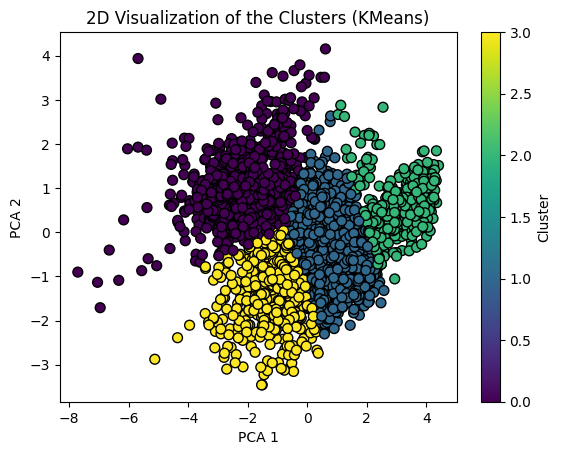

In [43]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(reduced_2_PCA)
PCA_2_pred = kmeans.predict(reduced_2_PCA)

# 2D Visualization
plt.scatter(reduced_2_PCA[:, 0], reduced_2_PCA[:, 1], c=PCA_2_pred, cmap='viridis', s=50, edgecolor='k')
plt.title("2D Visualization of the Clusters (KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
#plt.savefig("2d_clusters_kmeans.png")
plt.show()

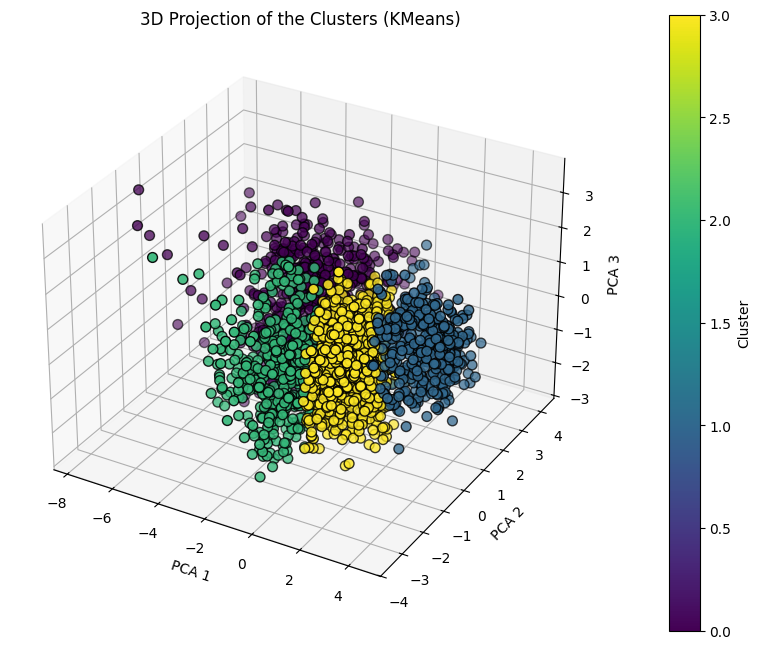

Silhouette Score (2D): 0.4036594205052255
Silhouette Score (3D): 0.2800138325535909


In [44]:
# PCA for 3D Visualization
pca3 = PCA(n_components=3)
reduced_3_PCA = pca3.fit_transform(X)

# KMeans for 3D Clustering
kmeans_3d = KMeans(n_clusters=4, random_state=0)
PCA_3_pred = kmeans_3d.fit_predict(reduced_3_PCA)

# 3D Visualization
reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns=['PCA 1', 'PCA 2', 'PCA 3'])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(reduced_3_PCA['PCA 1'], reduced_3_PCA['PCA 2'], reduced_3_PCA['PCA 3'], c=PCA_3_pred, cmap='viridis', s=50, edgecolor='k')
ax.set_title("3D Projection of the Clusters (KMeans)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Add colorbar to 3D plot
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Cluster")

#plt.savefig("3d_clusters_kmeans.png")
plt.show()

# Evaluate Clustering Performance
print("Silhouette Score (2D):", silhouette_score(reduced_2_PCA, PCA_2_pred))
print("Silhouette Score (3D):", silhouette_score(reduced_3_PCA, PCA_3_pred))

# **7-GMM for Clustering**

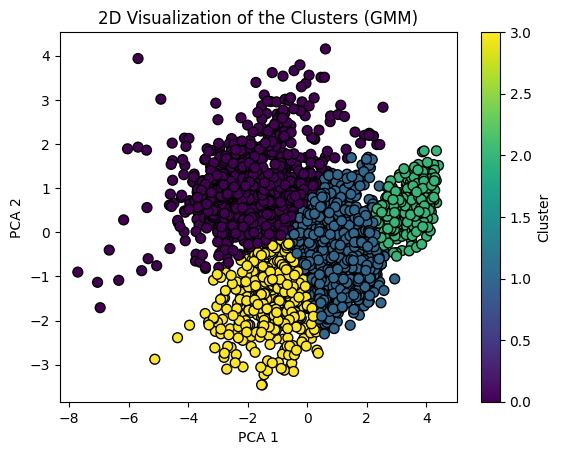

In [45]:
model = GaussianMixture(n_components=4, random_state=0)
model.fit(reduced_2_PCA)
PCA_2_pred = model.predict(reduced_2_PCA)

# 2D Visualization
plt.scatter(reduced_2_PCA[:, 0], reduced_2_PCA[:, 1], c=PCA_2_pred, cmap='viridis', s=50, edgecolor='k')
plt.title("2D Visualization of the Clusters (GMM)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
#plt.savefig("2d_clusters.png")
plt.show()

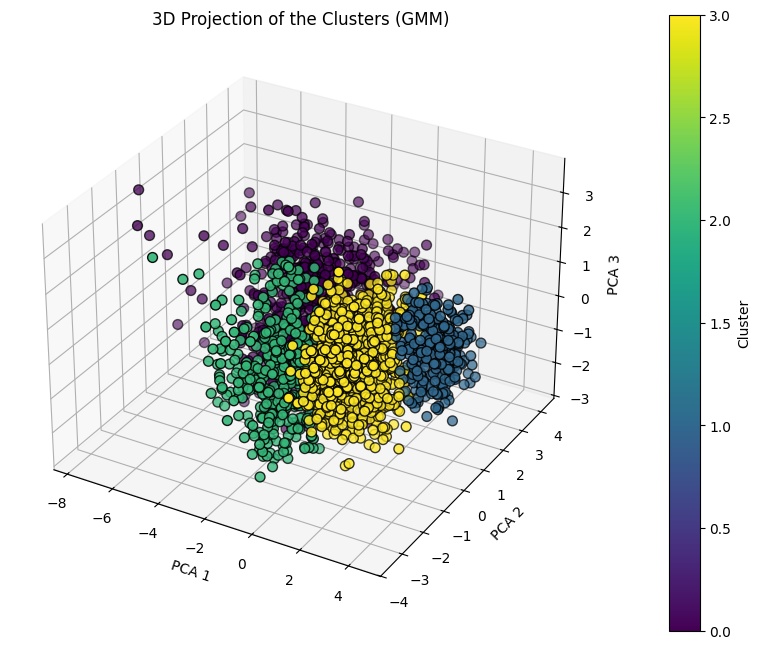

Silhouette Score (2D): 0.39145938708489114
Silhouette Score (3D): 0.2714733711658997


In [46]:
# PCA for 3D Visualization
pca3 = PCA(n_components=3)
reduced_3_PCA = pca3.fit_transform(X)

# GMM for 3D Clustering
mod = GaussianMixture(n_components=4, random_state=0)
PCA_3_pred = mod.fit_predict(reduced_3_PCA)

# 3D Visualization
reduced_3_PCA = pd.DataFrame(reduced_3_PCA, columns=['PCA 1', 'PCA 2', 'PCA 3'])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(reduced_3_PCA['PCA 1'], reduced_3_PCA['PCA 2'], reduced_3_PCA['PCA 3'], c=PCA_3_pred, cmap='viridis', s=50, edgecolor='k')
ax.set_title("3D Projection of the Clusters (GMM)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Add colorbar to 3D plot
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Cluster")

plt.savefig("3d_clusters.png")
plt.show()

# Evaluate Clustering Performance
print("Silhouette Score (2D):", silhouette_score(reduced_2_PCA, PCA_2_pred))
print("Silhouette Score (3D):", silhouette_score(reduced_3_PCA, PCA_3_pred))